# Generating the cluster number density

We will compute the cluster number density, $n(s, p)$, from sets of percolating two-dimensional clusters. As the cluster number density is not known analytically in all but the simplest systems, i.e., the infinite dimensional and the one-dimensional system, we will estimate it numerically. This is done by
\begin{align}
    n(s, p; L) \approx \frac{N_s}{ML^d},
\end{align}
where $s$ is the size of the cluster, $p$ the probability for a site to be set in the system, $L$ the length of a side in the system (assuming equal lengths for all sides), $d$ the dimension of the problem ($L^d$ is the volume), $N_s$ the number of clusters of size $s$ and $M$ the number of simulations performed.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import skimage
import tqdm

In [92]:
def is_percolating(prop, num_rows, num_cols):
    min_row, min_col, max_row, max_col = prop.bbox

    return max_row - min_row == num_rows or max_col - min_col == num_cols

In [93]:
def compute_cluster_area(system, p, remove_percolating_cluster=True):
    mat = system < p
    # Label and count the number of connected clusters
    labels, num_features = scipy.ndimage.measurements.label(mat)
    s_list = skimage.measure.regionprops(labels)

    new_s_list = []
    if remove_percolating_cluster:
        for s in s_list:
            if is_percolating(s, *system.shape):
                continue
            new_s_list.append(s)
    else:
        new_s_list = s_list
            
    area = list(map(lambda prop: prop.area, new_s_list))

    return area

Example code to plot a specific prop in a system.

```python
box = s[1].bbox
plt.matshow(labels[box[0]:box[2], box[1]:box[3]], cmap="hsv")
plt.show()
```

In [161]:
def compute_cluster_number_density(L, M, p, a=1.2):
    area = []
    for i in range(M):
        z = np.random.rand(L, L)
        area.extend(compute_cluster_area(z, p))

    n, s = np.histogram(area, L ** 2)

    nsp = n / (L ** 2 * M)

    logamax = np.ceil(np.log(max(s)) / np.log(a))
    bins = a ** np.arange(0, logamax, 1)

    nl, _ = np.histogram(area, bins)
    ds = np.diff(bins)
    sl = (bins[1:] + bins[:-1]) * 0.5
    nsl = nl / (M * L ** 2 * ds)

    return sl, nsl

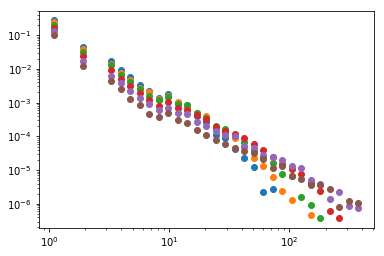

In [166]:
for p in np.linspace(0.4, 0.59, 6):
    plt.loglog(*compute_cluster_number_density(40, 100, p), "o")
plt.show()